In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/sabah0312/ml-datasets/refs/heads/main/toydata-truncated.txt'
df = pd.read_csv(url, sep="\t")

df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [ ]:
X = df[['x1','x2']].values
y = df['label'].values

In [ ]:
X.shape

(20, 2)

In [ ]:
y.shape

(20,)

## Visualization
*ignore the code*

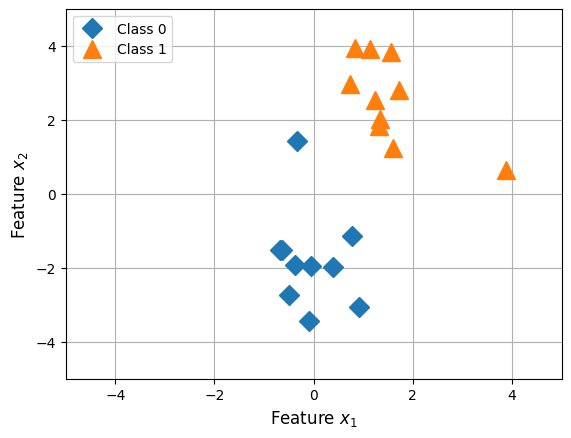

In [ ]:
import matplotlib.pyplot as plt
plt.plot(
    X[y == 0, 0],
    X[y == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X[y == 1, 0],
    X[y == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

## *Let's Start Our Model*

In [ ]:
class Perceptron:
  def __init__(self):
    self.w = [0.0, 0.0]
    self.bias = 0.0

In [ ]:
PPn = Perceptron()
print(" Weights", PPn.w)
print(" Bias", PPn.bias)

 Weights [0.0, 0.0]
 Bias 0.0


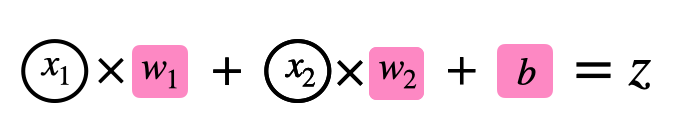

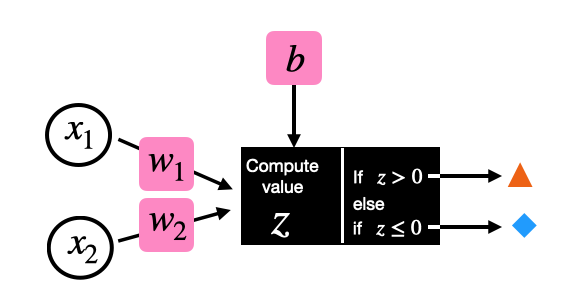

# **prediction **

In [ ]:
class Perceptron:
  def __init__(self):
    self.w = [0.0, 0.0]
    self.bias = 0.0

  def forward(self, x):
    z = self.w[0]*x[0] + self.w[1]*x[1] + self.bias
    if z > 0.0:
      prediction = 1
    else:
      prediction = 0
    return prediction

  def update(self, x, y_true):
    prediction = self.forward(x)
    error = y_true - prediction

In [ ]:
PPn = Perceptron()
PPn.forward([3.88, 0.65])

0

# **Updating the weight**

In [ ]:
class Perceptron:
  def __init__(self):
    self.w = [0.0, 0.0]
    self.bias = 0.0

  def forward(self, x):
    z = self.w[0]*x[0] + self.w[1]*x[1] + self.bias
    if z > 0.0:
      prediction = 1
    else:
      prediction = 0
    return prediction

  def update(self, x, y_true):
    prediction = self.forward(x)
    error = y_true - prediction

    self.bias += error
    self.w[0] += error * x[0]
    self.w[1] += error * x[1]

    # If error = 0: Prediction is correct → Don't change anything
    # If error = +1: We predicted 0 but true label is 1 → Need to increase output
    # If error = -1: We predicted 1 but true label is 0 → Need to decrease output
    return error

In [ ]:
PPn = Perceptron()
PPn.update([3.88, 0.65], 1)

1

In [ ]:
print(f" weights: {PPn.w}")
print(f" bias : {PPn.bias}")

 weights: [3.88, 0.65]
 bias : 1.0


# **Update for all train data**

In [ ]:
error_count = 0
for i in range(len(X)):
  error = PPn.update(X[i], y[i])
  error_count += abs(error)
print(f"error_count: {error_count}")
print(f" weights: {PPn.w}")
print(f" bias : {PPn.bias}")

error_count: 0
 weights: [np.float64(2.86), np.float64(1.98)]
 bias : -3.0


## Epoch

In [ ]:
PPn = Perceptron()
print(f"initial weights: {PPn.w}")
print(f"initial bias : {PPn.bias}")
epoch_no = 5
for epoch in range(epoch_no):
  error_count = 0
  for i in range(len(X)):
    error = PPn.update(X[i], y[i])
    error_count += abs(error)
  print(f"error_count: {error_count}")
  print(f" weights: {PPn.w}")
  print(f" bias : {PPn.bias}")

initial weights: [0.0, 0.0]
initial bias : 0.0
error_count: 1
 weights: [np.float64(3.88), np.float64(0.65)]
 bias : 1.0
error_count: 3
 weights: [np.float64(2.53), np.float64(3.42)]
 bias : -2.0
error_count: 1
 weights: [np.float64(2.86), np.float64(1.98)]
 bias : -3.0
error_count: 0
 weights: [np.float64(2.86), np.float64(1.98)]
 bias : -3.0
error_count: 0
 weights: [np.float64(2.86), np.float64(1.98)]
 bias : -3.0


## Visualizing the plot boundary
*Ignore the code*

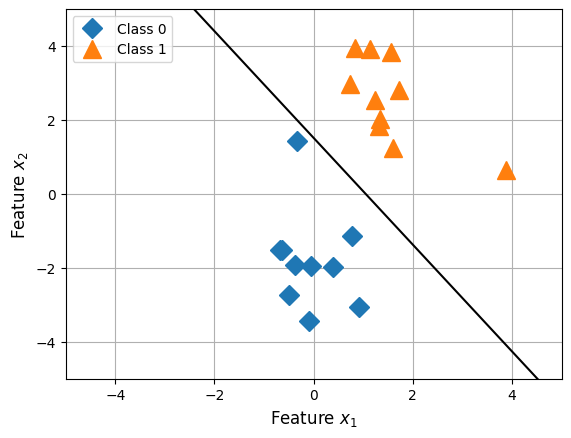

In [ ]:
def plot_decision_boundary(model, X, y, x_range=(-5, 5), y_range=(-5, 5)):
    # Extract weights and bias
    w1, w2 = model.w[0], model.w[1]
    b = model.bias

    # Calculate boundary line endpoints
    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    # Plot class 0 points
    plt.plot(
        X[y == 0, 0],
        X[y == 0, 1],
        marker="D",
        markersize=10,
        linestyle="",
        label="Class 0",
    )

    # Plot class 1 points
    plt.plot(
        X[y == 1, 0],
        X[y == 1, 1],
        marker="^",
        markersize=13,
        linestyle="",
        label="Class 1",
    )

    # Plot decision boundary
    plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

    plt.legend(loc=2)
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.xlabel("Feature $x_1$", fontsize=12)
    plt.ylabel("Feature $x_2$", fontsize=12)
    plt.grid()
    plt.show()

# **# For any number of features ???**

In [ ]:
class Perceptron:
  def __init__(self, num_features):
    self.w = [0.0 for _ in range(num_features)]
    self.bias = 0.0

  def forward(self, x):
    z = self.bias
    for i, _ in enumerate(self.w):
      z += self.w[i] * x[i]

    if z > 0.0:
      prediction = 1
    else:
      prediction = 0
    return prediction

  def update(self, x, y_true):
    prediction = self.forward(x)
    error = y_true - prediction

    self.bias += error
    for i, _ in enumerate(self.w):
      self.w[i] += error * x[i]
    return error

In [ ]:
PPn = Perceptron(2)
print(f"initial weights: {PPn.w}")
print(f"initial bias : {PPn.bias}")
epoch_no = 5
for epoch in range(epoch_no):
  error_count = 0
  for i in range(len(X)):
    error = PPn.update(X[i], y[i])
    error_count += abs(error)
  print(f"error_count: {error_count}")
  print(f" weights: {PPn.w}")
  print(f" bias : {PPn.bias}")

initial weights: [0.0, 0.0]
initial bias : 0.0
error_count: 1
 weights: [np.float64(3.88), np.float64(0.65)]
 bias : 1.0
error_count: 3
 weights: [np.float64(2.53), np.float64(3.42)]
 bias : -2.0
error_count: 1
 weights: [np.float64(2.86), np.float64(1.98)]
 bias : -3.0
error_count: 0
 weights: [np.float64(2.86), np.float64(1.98)]
 bias : -3.0
error_count: 0
 weights: [np.float64(2.86), np.float64(1.98)]
 bias : -3.0
